**구글드라이브 imoprt**





**필요한 모듈 import**


In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

import os
import cv2
import numpy as np
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.utils import shuffle  
import seaborn as sns
import cv2
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
import pandas as pd
from tqdm import tqdm
import os





**오류 발생하면 주석 지우고 설치 후 진행**






In [139]:
#!apt-get install -y libsm6 libxext6 libxrender-dev
#!pip install opencv-python

In [140]:
#!pip install tensorflow==2.6.0
#!pip install keras~=2.6.0

In [141]:
#!pip install -U efficientnet

**dict 형태로 클래스 라벨링**

In [142]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
mapclass = {0 : 'bag', 1 : 'bed', 2 : 'chair', 3 : 'coffeetable', 4 : 'cup' , 5 : 'kitchentools', 6 : 'lamp', 7 : 'laptop', 8 : 'LivingSofa', 9 : 'pot', 10 : 'shoe'}

**이미지 경로 불러오기**

**아직 이미지로 처리한건 아니고 경로만 가져옴**

In [143]:
from pathlib import Path
train_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train")
train_path.glob(r'**/*.png')

valid_path = Path("/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val")
valid_path.glob(r'**/*.png')

<generator object Path.glob at 0x7f655ab1a7d0>

**불러온 이미지 경로를 리스트 형태로 저장**

In [144]:
train_filepath = list(train_path.glob(r'**/*.png'))
valid_filepath = list(valid_path.glob(r'**/*.png'))

print(train_filepath)

[PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png'), PosixPath('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dat

**제대로 됐나 확인**

In [145]:
for i in train_filepath:  
  num = str(i.stem)
  print(i)
  print(num)
  print(int(num[3:8]))

/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png
img00000
0
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png
img00001
1
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png
img00002
2
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png
img00016
16
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png
img00014
14
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png
img00009
9
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png
img00018
18
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png
img00010
10
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00005.png
img00005

In [146]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')
for i in csv_file['file_name']:
  print(int(i[3:8]))

47
53
52
46
50
44
45
51
55
41
69
68
40
54
42
56
57
43
18
24
30
31
25
19
33
27
26
32
36
22
23
37
21
35
9
8
34
20
39
5
11
10
4
38
12
6
7
13
17
3
2
16
0
14
28
29
15
1
66
67
59
71
65
64
70
58
60
48
49
61
63
62
84
90
133
127
126
132
91
85
93
87
78
118
124
130
131
125
119
79
86
92
96
82
121
135
109
108
134
120
83
97
81
95
136
122
123
137
94
80
142
143
141
140
99
72
112
106
107
113
73
98
139
105
111
110
104
138
74
100
114
128
129
115
101
75
88
77
117
103
102
116
76
89
193
187
178
150
144
145
151
179
186
192
184
190
147
153
152
146
191
185
208
181
195
156
157
194
180
209
196
182
155
169
168
154
183
197
207
213
159
171
165
164
170
158
212
206
210
204
199
166
172
173
167
198
205
211
215
201
188
163
177
176
162
189
200
214
202
174
160
148
149
161
175
203
286
279
245
251
250
244
278
287
285
252
246
247
253
284
280
257
243
242
256
281
283
240
254
268
269
255
241
282
226
232
233
227
219
231
225
224
230
218
234
220
221
235
223
237
236
222
238
239
229
228
216
217
258
264
270
271
265
259
273
267
266
27

In [147]:
os.path.split(os.path.split(train_filepath[0])[1]) 
    
    

('', 'img00000.png')

In [148]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [149]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

**리스트에 있는 이미지 경로 순서대로 라벨링**

In [150]:
classes_train = []
classes_valid = []


In [151]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train_data.csv')

for i in train_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_train.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [152]:
print(len(classes_train))

864


In [153]:
csv_file = pd.read_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val_data.csv')

for i in valid_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_valid.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break
      

  

In [154]:
print(len(classes_valid))

133


In [155]:
print(len(classes_train))
print(len(classes_valid))

864
133


In [156]:
print(classes_valid)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 4, 3, 2, 3, 3, 3, 3, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 8, 8, 7, 7, 8, 8, 8, 7, 8, 8, 7, 9, 8, 9, 8, 8, 9, 7, 8, 9, 7, 7, 9, 7, 7, 10, 9, 9, 10, 10, 10, 10, 9, 9, 10, 9, 10, 9, 10, 10, 9, 10, 9, 10, 9, 10, 10, 10]


**이미지 경로를 통해 이미지 저장**

In [157]:
train_images = []
print(len(train_images))

0


In [158]:
valid_images = []
print(len(valid_images))

0


In [159]:
for i in train_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  train_images.append(tmp)

/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00000.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00001.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00002.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00016.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00014.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00009.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00018.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00010.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00005.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/train/img00007.png


In [160]:
print(len(train_images))

864


In [161]:
for i in valid_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  valid_images.append(tmp)

/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00006.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00000.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00008.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00004.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00003.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00009.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00005.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00007.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00010.png
/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/val/img00001.png
/content/drive/MyDri

In [162]:
print(len(valid_images))

133


In [163]:
valid_images = np.array(valid_images, dtype = 'float32') / 255

In [164]:
train_images = np.array(train_images, dtype = 'float32') / 255

In [165]:
classes_train = np.array(classes_train, dtype = 'int32')  

In [166]:
classes_valid = np.array(classes_valid, dtype = 'int32')

In [167]:
print(len(valid_images))
print(len(train_images))

133
864


****라벨링된 결과 시각화해서 확인하기****

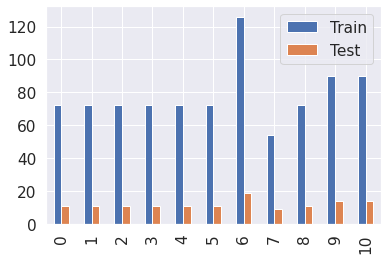

In [168]:
df=pd.concat([pd.DataFrame(np.unique(classes_train,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(classes_valid,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
              
df.plot(kind='bar');

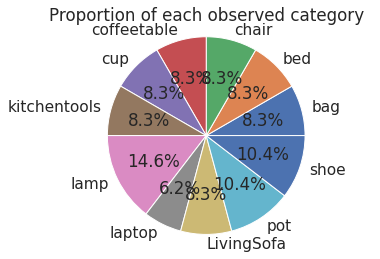

In [169]:
plt.pie(df['Train'],
        explode=(0, 0, 0, 0, 0, 0,0,0,0,0,0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

**이미지가 잘 저장됐는지 확인**

In [170]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(classes_train[index]).map(mapclass))[0]
    else:
        img=valid_images[index]
        lbl=list(pd.Series(classes_valid[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

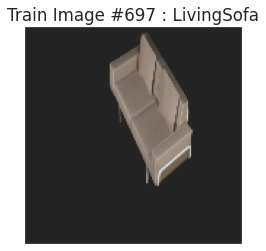

In [171]:
displayimagebyindex(np.random.randint(0,800),dset='Train')

**모델 구축 시작**


**train_images에는 이미지가, classes_train에는 이미지의 클래스가 저장됨**

In [172]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [173]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

**학습 시작**

In [174]:
history = model.fit(train_images, classes_train, batch_size=128, epochs=20, validation_split = 0.2)
#history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
6/6 [==============================] - 16s 3s/step - loss: 2.7712 - accuracy: 0.1027 - val_loss: 3.3519 - val_accuracy: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 11s 2s/step - loss: 2.0508 - accuracy: 0.2967 - val_loss: 4.2385 - val_accuracy: 0.0116
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 1.6614 - accuracy: 0.4428 - val_loss: 7.4150 - val_accuracy: 0.0058
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 1.3514 - accuracy: 0.5702 - val_loss: 8.5060 - val_accuracy: 0.0116
Epoch 5/20
6/6 [==============================] - 12s 2s/step - loss: 1.0980 - accuracy: 0.6729 - val_loss: 8.8067 - val_accuracy: 0.0000e+00
Epoch 6/20
6/6 [==============================] - 12s 2s/step - loss: 0.9090 - accuracy: 0.7106 - val_loss: 9.7663 - val_accuracy: 0.1040
Epoch 7/20
6/6 [==============================] - 12s 2s/step - loss: 0.6558 - accuracy: 0.8017 - val_loss: 12.4677 - val_accuracy: 0.0405
Epoch 8/20
6/6 [=========

In [175]:
print(classes_valid)

[ 0  0  0  0  0  0  0  0  0  0  0  2  1  1  2  2  2  1  2  1  1  1  2  2
  1  1  2  2  1  1  1  2  3  3  4  3  3  4  3  4  4  4  3  4  4  4  5  4
  4  4  3  2  3  3  3  3  5  6  6  6  6  5  6  6  5  6  5  6  6  6  6  5
  6  6  6  5  5  5  5  6  6  6  6  5  6  8  8  7  7  8  8  8  7  8  8  7
  9  8  9  8  8  9  7  8  9  7  7  9  7  7 10  9  9 10 10 10 10  9  9 10
  9 10  9 10 10  9 10  9 10  9 10 10 10]


In [176]:
print(len(valid_images))
print(len(classes_valid))

133
133


**평가 시작**

In [177]:
val_loss = model.evaluate(valid_images, classes_valid)

5/5 [==============================] - 1s 123ms/step - loss: 4.3512 - accuracy: 0.8120


In [178]:
predictions = model.predict(valid_images)
pred_labels = np.argmax(predictions, axis = 1)

In [193]:
print(pred_labels)

[0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 3 3 4 3 3
 4 3 4 4 4 3 4 4 4 5 4 4 4 3 2 3 3 3 3 5 6 6 6 6 5 6 6 5 6 5 6 6 6 6 5 6 6
 6 5 5 5 5 6 6 6 6 5 6 8 8 7 7 8 8 8 7 8 8 7 6 8 6 8 8 6 7 8 6 7 7 9 7 7 9
 9 6 0 6 2 6 9 6 0 6 0 6 8 0 2 0 6 0 6 6 7 0]


In [179]:
def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

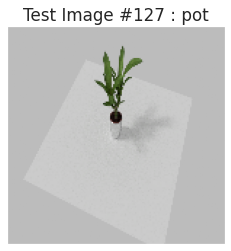

Predicted Class : 
      lamp


In [180]:
checkpredictions(np.random.randint(100,133))
#checkpredictions(122)

In [181]:
print(classification_report(classes_valid, pred_labels))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       1.00      1.00      1.00        11
           2       0.85      1.00      0.92        11
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       0.59      1.00      0.75        19
           7       0.90      1.00      0.95         9
           8       0.92      1.00      0.96        11
           9       0.75      0.21      0.33        14
          10       0.00      0.00      0.00        14

    accuracy                           0.81       133
   macro avg       0.78      0.84      0.79       133
weighted avg       0.75      0.81      0.75       133



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**오류 확인**

In [182]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [183]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

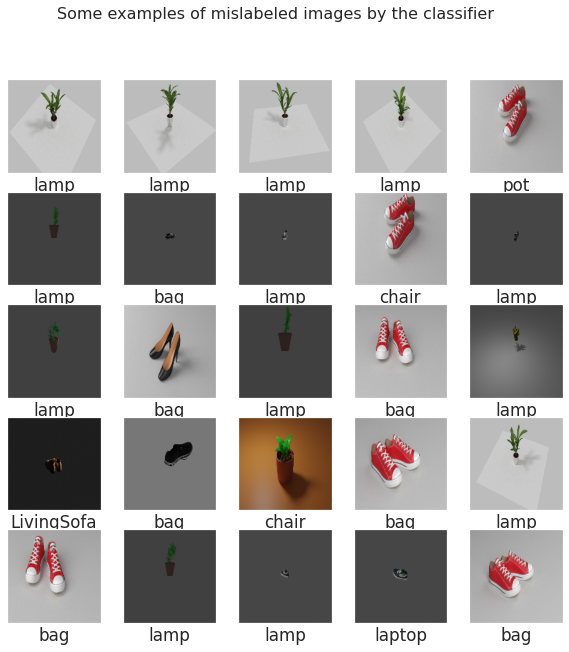

In [184]:
print_mislabeled_images(class_names, valid_images, classes_valid, pred_labels)

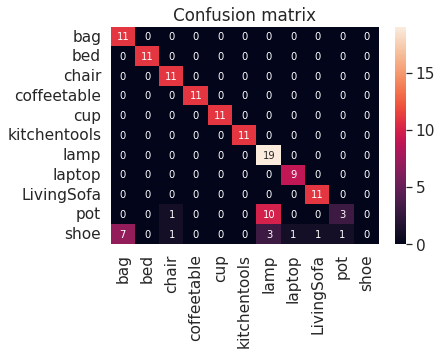

In [185]:
CM = confusion_matrix(classes_valid, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

**결과를 주어진 csv파일에 저장하자.**

In [213]:
name_list = []

for i in valid_filepath:
  tmp = str(i.stem) + '.png'
  name_list.append(tmp)
            

In [214]:
class_list = []

for i in pred_labels:
  tmp = mapclass[i]
  class_list.append(tmp)

In [215]:
dataframe = pd.DataFrame({'file_name' : name_list, 'class' : class_list})

print(dataframe)

        file_name   class
0    img00006.png     bag
1    img00000.png     bag
2    img00008.png     bag
3    img00004.png     bag
4    img00003.png     bag
..            ...     ...
128  img00127.png     bag
129  img00116.png    lamp
130  img00121.png    lamp
131  img00120.png  laptop
132  img00129.png     bag

[133 rows x 2 columns]


In [216]:
dataframe.to_csv('/content/drive/MyDrive/2022_AI활용 표현과 문제해결/TermProject/Term_Dataset/result.csv', index = True, encoding = 'cp949')

**끝,,**